# Figures

This tutorial is based on the "Figures in Scilab (french)" tutorial written by Sylvain Latot. Thanks for his contribution!

The goal of this tutorial is to progress from the basic **[plot2d](https://help.scilab.org/plot2d.html)** function to obtaining advanced figures both from a graphical point of view and from an interactivity point of view. 

## plot2d function

The function to use is **[plot2d](https://help.scilab.org/plot2d.html)**.
Use `plot2d(x, y)` with:

- x, vector (rows or columns)
- y, vector of same size as x

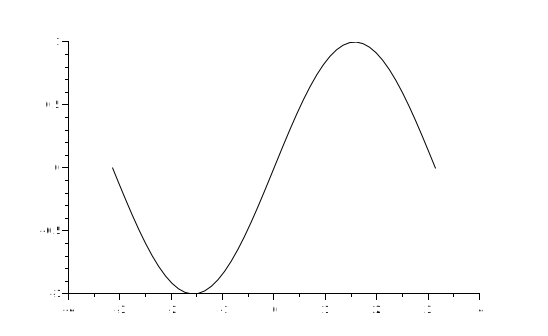

In [1]:
x = linspace(-%pi, %pi, 50);
y = sin(x);
plot2d(x, y);

## Figure properties

A figure is defined by its:

- position
- size
- menus
- toolbar
- information bar
- ...

The [**figure_properties**](https://help.scilab.org/figure_properties.html) help page gives an overview of all available properties.

**[gcf](https://help.scilab.org/gcf.html)** function allows to list all current figure properties.


   564.   464.


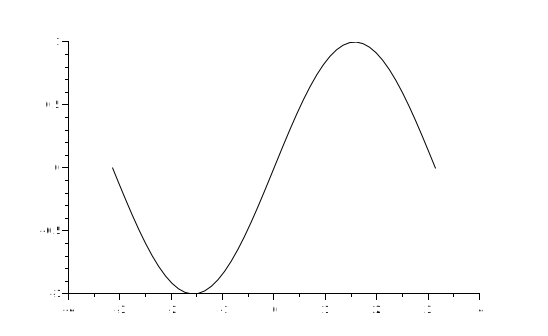

In [2]:
x = linspace(-%pi, %pi, 50);
y = sin(x);
plot2d(x, y);
f = gcf();
disp(f.figure_size)

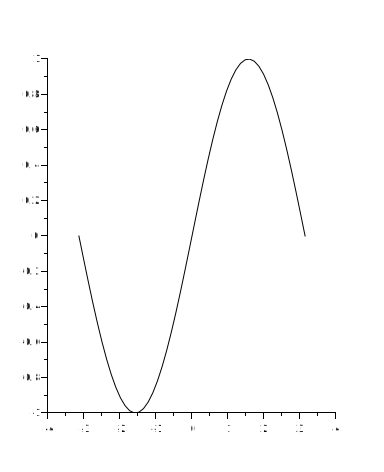

In [3]:
plot2d(x, y);
f = gcf();
f.figure_size = [400, 600];

## Axes properties

The axes are children of figure.
```
f = gcf(); // get current figure
ax =  f.children(i); // i is the child number. The last one created is number 1
```
**[gca](https://help.scilab.org/gca.html)** function allows to list all current axes properties. **[axes_properties](https://help.scilab.org/axes_properties.html)** help page give all information on properties.

To place your axes, use:

- **x_location**: "origin", "bottom" (by default), "top" and "middle"
- **y_location**: "origin", "left" (by default), "right" and "middle"


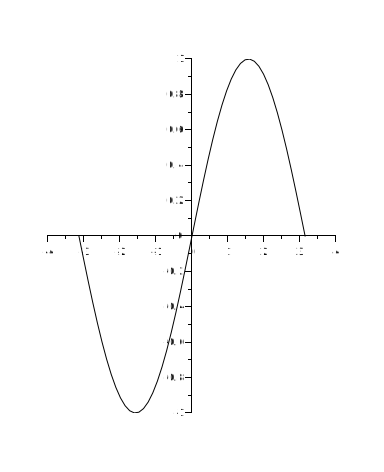

In [4]:
x=linspace(-%pi,%pi,50);
y=sin(x);
plot2d(x,y);
f=gcf();
f.figure_size=[400,600];
ax=f.children(1);
ax.x_location='origin'; // by default "bottom", can be also "top" and "middle"
ax.y_location='origin'; // by default "left", can be also "right" and "middle"

Mention: if you are drawing 3D graphics, **z_location** exists.

It is possible to hide axes as well as change their direction:

- **axes_visible**: specifies whether each axis is drawn or not ("on"/"off")
- **axes_reverse**: specifies the direction of the increasing values ("on"/"off")

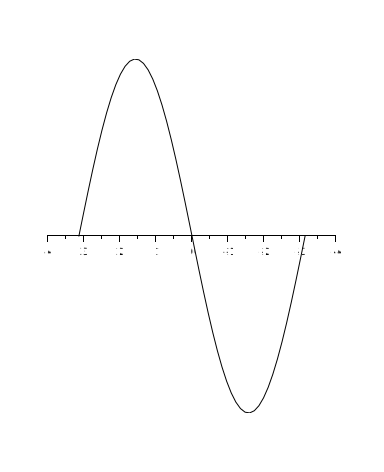

In [5]:
x=linspace(-%pi,%pi,50);
y=sin(x);
plot2d(x,y);
f=gcf();
f.figure_size=[400,600];
ax=f.children(1);
ax.x_location='origin';
ax.y_location='origin';
ax.axes_visible=['on', 'off', 'off'];
ax.axes_reverse=['on', 'off', 'off'];

#### Grid property

To display a grid on axes, use **grid** property. This property expects a vector `[xcolor, ycolor, zcolor]` to draw the grid with color along respective directions. The default value is [-1, -1, -1]. If you are drawing 2d graphics, you can only specify `[xcolor, ycolor]`.

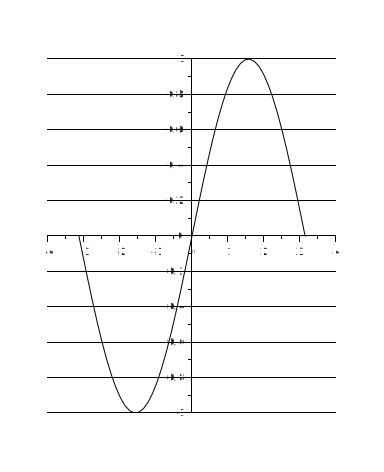

In [6]:
x=linspace(-%pi,%pi,50);
y=sin(x);
plot2d(x,y);
f=gcf();
f.figure_size=[400,600];
ax=f.children(1);
ax.x_location='origin';
ax.y_location='origin';
ax.grid=[-1,0]; //-1 does not draw the grid on this X axis

It is possible to change the style of grid thanks to **grid_style** property: `[xlinestyle, ylinestyle, zlinestyle]`, values include between 1 to 10.

![grid_style.png](images/grid_style.png)

For the thickness of the grid, use **grid_thickness**.

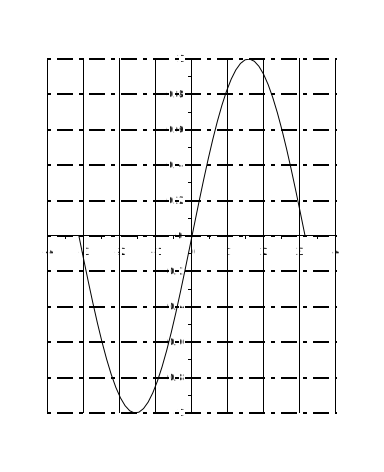

In [7]:
x=linspace(-%pi,%pi,50);
y=sin(x);
plot2d(x,y);
f=gcf();
f.figure_size=[400,600];
ax=f.children(1);
ax.x_location='origin';
ax.y_location='origin';
ax.grid=[0,0];
ax.grid_thickness=[1,2];
ax.grid_style=[1,4];

#### data_bounds and tight_limits properties

To manage the limit of axes, you need to define the **data_bounds** and **tight_limits** properties.

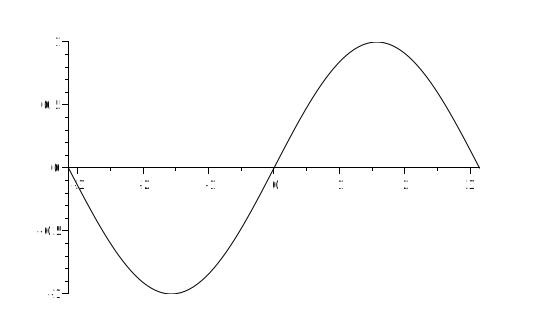

In [8]:
x=linspace(-%pi,%pi,100);
y=sin(x);
plot2d(x,y);
ax=gca();
ax.font_size=2; // font_size specifies the character size of tics labels
ax.data_bounds=[x(1) -1; x($) 1]; // [x_min y_min ; x_max y_max]
ax.tight_limits=['on' 'on' 'on'];
ax.x_location='origin';

#### Ticks management

In the previous example, we changed **font_size** properties. Several properties allow you to change the display of tics:

- **auto_ticks**: "on"/"off", the axes are automatically (or not) graduated.
- **x_ticks**, **y_ticks** and **z_ticks** manages the locations and labels for all directions.
- **ticks_format** specifies the format for each axis. LaTeX format is authorized.
- **sub_ticks** specifies the number of tics to draw between two main tics.

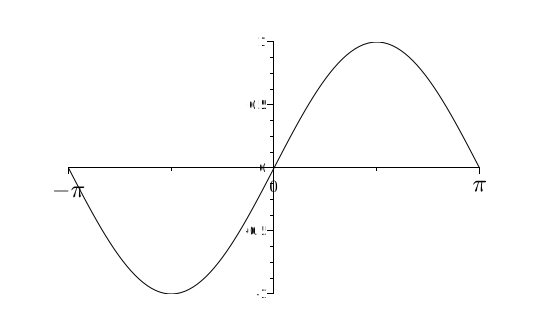

In [9]:
x=linspace(-%pi,%pi,100);
y=sin(x);
plot2d(x,y);
ax=gca();
ax.font_size=2;
ax.data_bounds=[x(1) -1; x($) 1];
ax.tight_limits=['on' 'on' 'on'];
ax.x_location='origin';
ax.y_location='origin';
ax.auto_ticks=['off' 'on' 'on']; // "ticks" are not managed automatically on X axis
x_t_location=[-%pi 0 %pi];
x_t_label=['$\huge{-\pi}$' '$\Large{0}$' '$\huge{\pi}$']; // LaTeX notation, of same size as x_t_location
ticks_x = tlist(["ticks","locations","labels"], x_t_location, x_t_label); // it's a tlist
ax.x_ticks=ticks_x;
ax.sub_ticks=[1 3]; // 1 sub_tick on x, 3 sub_ticks on y

It is possible to replace a tick using the **[xstring](https://help.scilab.org/xstring.html)** function.

You must delete the automatically created tick. Then, you define the replacement text, possibly using LaTeX syntax.

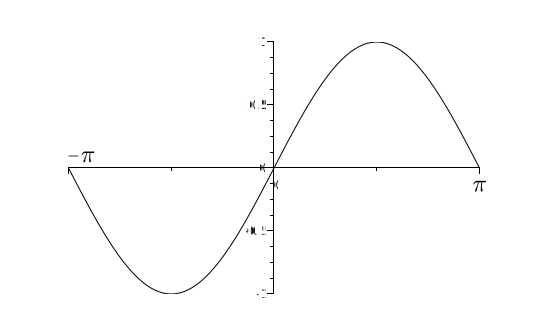

In [10]:
x=linspace(-%pi,%pi,100);
y=sin(x);
plot2d(x,y);
ax=gca();
ax.font_size=2;
ax.data_bounds=[x(1) -1; x($) 1];
ax.tight_limits=['on' 'on' 'on'];
ax.x_location='origin';
ax.y_location='origin';
ax.auto_ticks=['off' 'on' 'on'];
x_t_location=[-%pi 0 %pi];
x_t_label=['' '0' '$\huge{\pi}$']; // LaTeX notation, we define an empty text for the first tick
ticks_x = tlist(["ticks","locations","labels"], x_t_location, x_t_label);
ax.x_ticks=ticks_x;
ax.sub_ticks=[1 3];
xstring(-%pi,0,'$\huge{-\pi}$');
// if the position is not suitable, you manage the position "manually"
text=gce(); // get current entity
text.data=[-3.3,0]; // manages the position (x,y)

The **[drawaxis](https://help.scilab.org/drawaxis.html)** function draws a vertical or horizontal axis.
`ax = drawaxis(x, y, dir)`:

- `x` and `y` give the position of the axis,
- `dir` specifies the tics direction: 'u' ('up') or 'd' ('down') on horizontal axis, 'l' ('left') or 'r' ('right') on vertical axis.

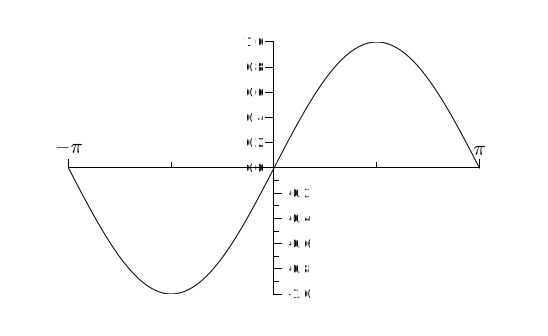

In [11]:
x=linspace(-%pi,%pi,100);
y=sin(x);
plot2d(x,y,1,'020'); //"1" corresponds to the line style and "020" delete the axes
ax1=drawaxis(x=[-%pi 0 %pi] ,y=0,dir='u') ;
ax1.tics_labels=['$\huge{-\pi}$' ' ' '$\huge{\pi}$'];
ax2=drawaxis(x=0 ,y=[-1:0.2:0],dir='r'); // under the x axis
y_c=[-1 -0.8 -0.6 -0.4 -0.2 0 ];
ax2.ytics_coord = y_c; // not use tlist
y_l=[];
for i=1:5
y_l=[y_l sprintf('%1.1f',y_c(i))];
end
y_l=[y_l ' '];
ax2.tics_labels=y_l;
ax2.labels_font_size = 2;
ax3=drawaxis(x=0 ,y=[0:0.2:1],dir='l'); // under the x axis
ax3.format_n='%1.1f'; // faster if "0" is needed
ax3.sub_tics=4; // to have 3 (4 intervals)
ax3.labels_font_size = 2;

The axes properties allow to quickly add information, but without being able to refine the positions.  
One of the advantages is being able to know the width of the text you want to use.  
Note hat the title is placed in an area not accesible by the **[xstring](https://help.scilab.org/xstring.html)** function.

```
x=linspace(-%pi,%pi,100);
y=1+sin(x);
plot2d(x,y);
ax = gca();
ax.font_size=2;
ax.data_bounds=[x(1) 0; x($) 2];
ax.tight_limits=['on' 'on' 'on'];
ax.x_location='origin';
ax.y_location='origin';
ax.auto_ticks=['off' 'on' 'on'];
x_t_location=[-%pi 0 %pi];
x_t_label=['$\huge{-\pi}$' '$\Large{0}$' '$\huge{\pi}$'];
ticks_x = tlist(["ticks","locations","labels"], x_t_location, x_t_label);
ax.x_ticks=ticks_x;
ax.sub_ticks=[1 3];

ax.title.text=['Mon titre' ; 'sur plusieurs lignes']; // a matrix form allows to write on several lines
ax.title.font_size=3;
// no possibility of drawing a frame, nor of centering the text
// on the other hand the text is above the plot where it is not possible to use the xstring function
ax.x_label.text='Label x';
ax.x_label.font_size=3;
temp=ax.x_label.position;
ax.x_label.position=[ax.data_bounds(2,1)+2*temp(1) temp(2)];
// max(x) -2*(1/2 width of text)
// the text being centered by default on 0 here, temp(1) is negative and corresponds to the half width of the text
y_l='$\large{y=\sin(t)+1}$';
ax.y_label.text=['Label ' y_l];
ax.y_label.font_size=3;
temp=ax.y_label.position;
y_l=ax.data_bounds(2,2)-2*((ax.data_bounds(2,2)+ax.data_bounds(1,2))/2-temp(2));
// max(y)-2*(moyenne(y)-position_inférieure) because y is positive
ax.y_label.position=[temp(1) y_l];
```

![plot_with_title.png](images/plot_with_title.png)

It is possible to use the **[xstring](https://help.scilab.org/xstring.html)** function to manage the position and alignment of texts.

Use **xstring(x,y,txt,a,b)** with:

- `x` and `y`, location of the text
- `txt`, string to display
- `a`, the orientation of the text clockwise in degrees
- `b`, indicates whether a box is drawn around the text

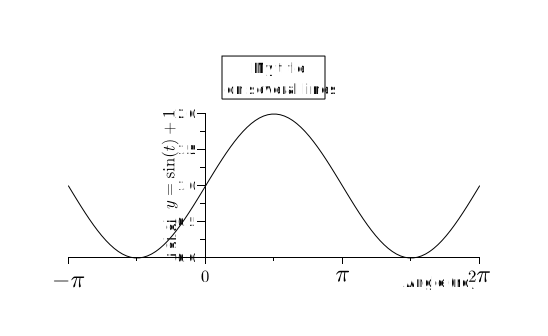

In [12]:
x=linspace(-%pi,2*%pi,100);
y=1+sin(x); // varie donc de 0 à 2
plot2d(x,y);
ax=gca();
ax.font_size=2;
min_y=-0.5;
ax.data_bounds=[x(1) min_y; x($) 3];
ax.tight_limits=['on' 'on' 'on'];
ax.x_location='origin';
ax.y_location='origin';
ax.axes_visible = ['on' 'off' 'off']; // vertical axis is not drawn
ax.auto_ticks=['off' 'on' 'on'];
x_t_location=[-%pi 0 %pi 2*%pi];
x_t_label=['$\huge{-\pi}$' '$\Large{0}$' '$\huge{\pi}$' '$\Large{2}\huge{\pi}$'];
ticks_x = tlist(["ticks","locations","labels"], x_t_location, x_t_label);
ax.x_ticks=ticks_x;
ax_vert=drawaxis(x=0 ,y=[0:0.5:2],dir='l'); // we impose a limited vertical axis which leaves room for the title
ax_vert.format_n='%1.1f';
ax_vert.sub_tics=2;
// ---------------------------------------------------------------------
// title definition
// ---------------------------------------------------------------------
t_pos_x=(ax.data_bounds(1,1)+ax.data_bounds(2,1))/2; // the middle of the horizontal axis
t_pos_y=2.5; // To be adjusted according to the size of the figure
xstring(t_pos_x,t_pos_y,['My title'; 'on several lines'],0,1);
title=gce();
title.font_size=3;
title.alignment='center'; // position of text in box
title.text_box_mode='centered';
// ---------------------------------------------------------------------
// end of title definition
// ---------------------------------------------------------------------
text_x='Angle (rd)';
xstring(1,1,text_x,0,0);
x_label=gce();
font_size=3;
x_label.font_size=font_size;
x_label.data=[4.5 min_y];
text_y_1='Label ';
text_y_2='$\large{y=\sin(t)+1}$';
text_y=[text_y_1 text_y_2];
xstring(0,1,text_y,0,0);
y_label=gce();
y_label.font_size=font_size;
y_label.font_angle=-90; // tilt of the text
y_label.data=[-0.5 0] ; // y_label position

### The place of the axes

Axes margins are defined by the **margins** property `ax.margins = [m1, m2, m3, m4]`:

- m1: the left margin
- m2: the right margin
- m3: the top margin
- and m4: the bottom margin

Default values are **[0.125 0.125 0.125 0.125]**

![plot_with_margins.png](images/plot_with_margins.png)

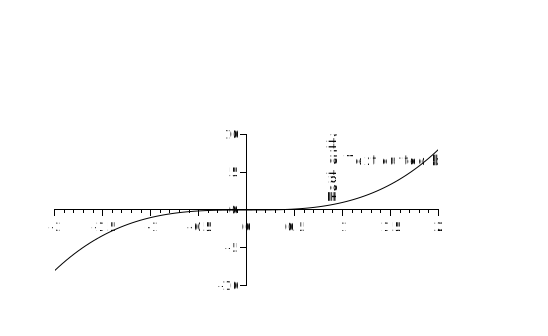

In [13]:
x=linspace(-2,2,100);
y=x.^3;
plot2d(x,y);
ax = gca();
ax.font_size=2;
ax.margins=[0.1 0.2 0.4 0.15];
ax.data_bounds=[x(1) -10; x($) 10];
ax.tight_limits=['on' 'on' 'on'];
ax.x_location='origin';
ax.y_location='origin';
xstring(1,5,'Text cutted by boundaries');
text=gce();
text.font_size=3;
xstring(1,1,'Text cutted by boundaries',-90);
text=gce();
text.font_size=3;

### Logarithmic axes

For a logarithmic scale, use the **log_flags** property. The expected value is a string of three characters ('n' for normal, 'l' for logarithm), one character per axis (x, y and z). The default value is 'nnn'.

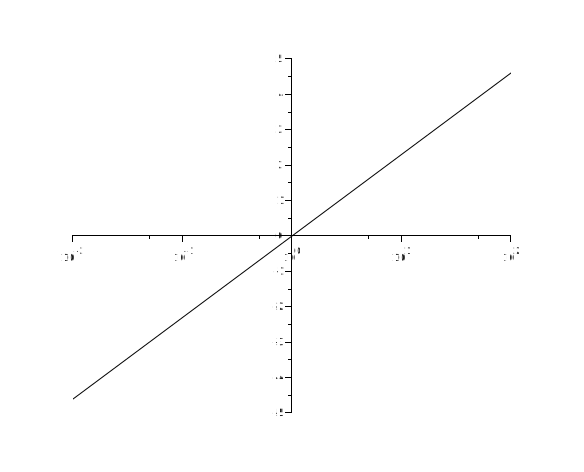

In [14]:
x=logspace(-2,2,100);
y=log(x);
plot2d(x,y);
gcf().figure_size=[600,600];
ax1=gca();
ax1.axes_visible=['on', 'on', 'off'];
ax1.axes_reverse=['off', 'off', 'off'];
ax1.x_location='origin';
ax1.y_location='origin'; // there is no "0" on a logarithmic axis, the axis is here placed at 10^0 (i.e. 1)
ax1.log_flags='lnn';

### Isometric scale on the axes

The **isoview** property manages automatically the correct proportion between the axes:

- "on", the scales are isometric on the axes
- "off", the scale is free.

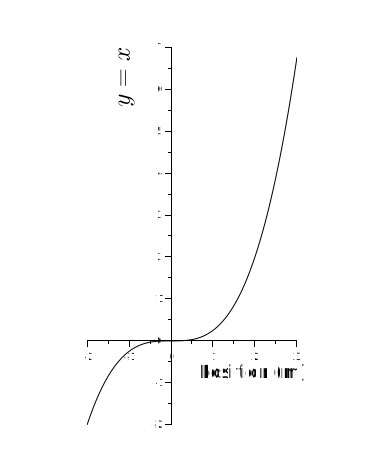

In [15]:
margins=[0.1 0.1 0.1 0.10];
y_min=-10;
y_max=30;
font_size=4;
rect_x=[1.9 0.67];

x=linspace(-2,3,100);
y=x.^3/4;
plot2d(x,y);

f=gcf();
figure_w=400;
figure_h=600;
f.figure_size=[figure_w figure_h];
f.color_map=graycolormap(10);
ax=f.children(1);
ax.margins=margins;
ax.x_location='origin';
ax.y_location='origin';
label_x_text='Position (m)';
xstring(0.02,0.5,label_x_text);
label_x=gce();
font_style=label_x.font_style;
label_x.font_size=font_size;
label_x_x=max(x)-rect_x(1)-0.5;
label_x_y=-rect_x(2)-0.4;
label_x.data=[label_x_x,label_x_y];
label_y_text='$\Huge{y=x^{3}}$';
xstring(0.02,0.5,label_y_text);
label_y=gce();
rect_y=xstringl(0,0,label_y_text);
label_y.font_angle=-90;
label_y_x=-0.79;
label_y_y=max(y)-1.24;
label_y.data=[label_y_x,label_y_y];
ax.isoview='on';

### Different fonts

The **font_style** property references the font and **font_size** property, the size of font.

The reference of font are:

- 0: monospaced font (Courier type),
- 1: Greek letter font (Symbol type),
- 2 to 5: serif font (Times type),
     - 2: roman, lean,
     - 3: italic, lean,
     - 4: roman, bold,
     - 5, italic, bold,
- 6 to 9: sans serif font (Arial type),
     - 6: roman, lean,
     - 7: italic, lean,
     - 8: roman, bold,
     - 9: italic, bold.

Font sizes range from 0 to 10; 0 corresponds to a body of 8 points, 1 to a body of 10 points, ..., 10 to a body of 54 points.

For more details on the fonts: see **[graphics_fonts](https://help.scilab.org/graphics_fonts.html)** help page


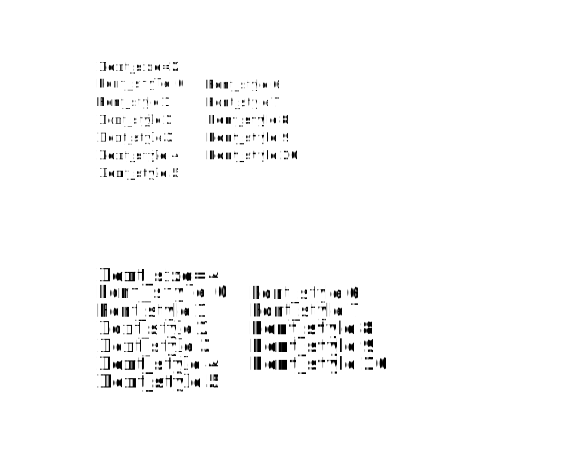

In [16]:
f1=scf(1);
f1.figure_size=[600,600];
ax1=f1.children(1);
ax1.axes_visible=['off', 'off', 'off'];
ax1.axes_reverse=['off', 'off', 'off'];
ax1.data_bounds=[-5 -5 ; 5 5];
ax1.tight_limits=['on' 'on' 'on'];
f1.figure_name='Different fonts';
font_size=2;
xstring(-4.5,4.5,'Font_size='+string(font_size))
text_font=gce();
text_font.font_size=font_size;
text_font.font_style=4;

for font_style=0:5
    xstring(-4.5,4-(font_style)*4.5/9,'Font_style '+ string(font_style))
    text_font=gce();
    text_font.font_size=font_size;
    text_font.font_style=font_style;
end

for font_style=6:10
    xstring(-2,4-(font_style-6)*4.5/9,'Font_style '+ string(font_style))
    text_font=gce();
    text_font.font_size=font_size;
    text_font.font_style=font_style;
end

font_size=4;
xstring(-4.5,-1.5,'Font_size='+string(font_size))
text_font=gce();
text_font.font_size=font_size;
text_font.font_style=4;

for font_style=0:5
    xstring(-4.5,-2-(font_style)*4.5/9,'Font_style '+ string(font_style))
    text_font=gce();
    text_font.font_size=font_size;
    text_font.font_style=font_style;
end

for font_style=6:10
    xstring(-1,-2-(font_style-6)*4.5/9,'Font_style '+ string(font_style))
    text_font=gce();
    text_font.font_size=font_size;
    text_font.font_style=font_style;
end

## Entity properties

gce() function allows to access all current entity properties. 
```
e = gce();
```

For more information on the entity properties: see **[gce](https://help.scilab.org/gce.html)** and **[graphics_entity](https://help.scilab.org/graphics_entities.html)** help pages.

### Marks

They are necessary to easily identify curves from each other.

They have various properties to manage their appearance, number and position:

- **mark_mode**: "on"/"off" for marker visibility
- **mark_style**: type of mark, value varying from 0 to 20
- **mark_size**: size of mark
- **mark_stride**: manages the spacing between markers
- **mark_offset**: manages the position of the first marker
- **mark_foreground** and **mark_background**: color respectively of the line and of the surface of the markers, designated by its index in the color table

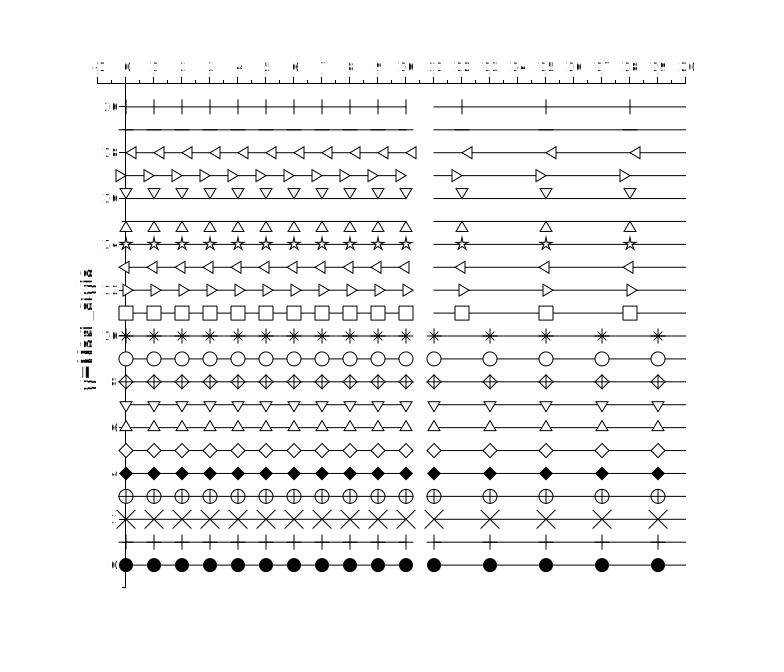

In [17]:

f=gcf();
f.figure_name='Les marqueurs';
figure_w=800;
figure_h=800;
f.figure_size=[figure_w figure_h];

ax=f.children(1);
ax.axes_visible=['on' 'on' 'off'];
ax.font_size=2;
ax.x_location='top';
ax.y_location='origin';

for i=0:20
    plot2d([0:10],(i)*ones([0:10]))
    curve=ax.children(1).children(1) ; // the last curve created is the first child of ax
    curve.mark_mode='on';
    curve.mark_style=i;
    curve.mark_size=3;
end

for i=0:10
    plot2d([11:20],(i)*ones([11:20]))
    curve=ax.children(1).children(1);
    curve.mark_mode='on';
    curve.mark_style=i;
    curve.mark_size=3;
    curve.mark_stride=2; // manages the number of "forgotten" markers, here 1 out of 2
end

for i=11:20
    plot2d([11:20],(i)*ones([11:20]))
    curve=ax.children(1).children(1);
    curve.mark_mode='on';
    curve.mark_style=i;
    curve.mark_size=3;
    curve.mark_stride=3; // manages the number of "forgotten" markers, here 1 out of 3
    curve.mark_offset=1; // manages the offset at the start of the curve
end

ax.y_label.text='y=Mark_style';
ax.y_label.font_size=4;
ax.data_bounds=[-1 -1; 20 21];
ax.tight_limits=['on' 'on' 'on'];

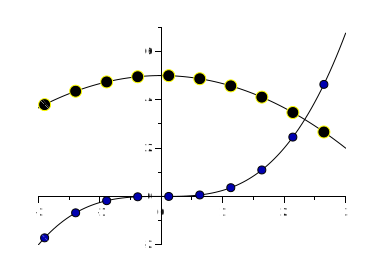

In [18]:
f=gcf();
figure_w=400;
figure_h=400;
f.figure_size=[figure_w figure_h];
ax=f.children(1);
x=linspace(-2,3,100);
y=x.^3/4;
plot2d(x,y);
margins=[0.1 0.1 0.1 0.10];
ax.margins=margins;
ax.x_location='origin';
ax.y_location='origin';
curve=ax.children(1).children(1);
curve.mark_mode='on';
curve.mark_style=9;
curve.mark_offset=2;
curve.mark_stride=10;
curve.mark_foreground=0;
curve.mark_background=10;
plot2d(x,5-x.^2/3);
temp=gce();
curve_1=temp.children(1);
curve_1.mark_mode='on';
curve_1.mark_style=9;
curve_1.mark_offset=2;
curve_1.mark_stride=10;
curve_1.mark_foreground=7;
curve_1.mark_background=1; // 0 rend le marqueur "transparent"
curve_1.mark_size=2;

### Thickness, foreground, line_style

The most commonly used properties are:

- **thickness**: n, n is an integer corresponding to line thickness
- **foreground**: n, n is an integer between 0 and p for a color map of the figure defined by `f.color_map = jetcolormap(p)`. See [colormap](https://help.scilab.org/colormap.html) help page.
- **line_style**: same values as **grid_style** property

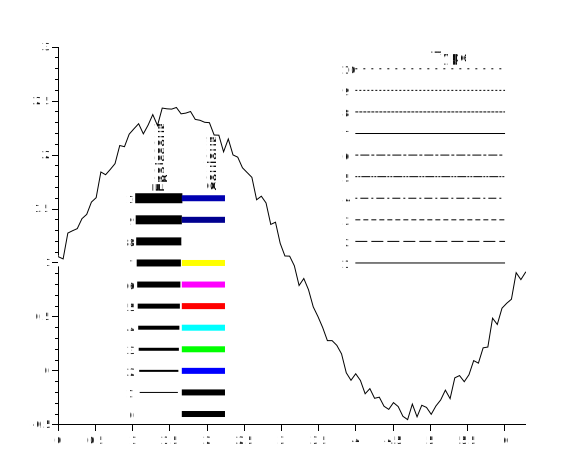

In [19]:
f1=scf(1); // set current figure
f1.figure_size=[600,600];
t=linspace(0,2*%pi,100);
plot2d(t,1+1.4*sin(t));

ax=f1.children(1);
ax.margins=[0.1 0.1 0.1 0.1];
ax.data_bounds=[0 -0.5; 2*%pi 3];
ax.tight_limits=['on' 'on' 'on'];

poly1=ax.children(1).children(1);
poly1.thickness=6;
poly1.foreground=8;

plot2d(t,1+1.4*sin(t)+0.2*(0.5-rand(t)));
poly2=ax.children(1).children(1);
poly2.thickness=1;
poly2.foreground=0;

for line_type=1:10
    plot2d([4 6],((line_type-1)*0.2+1)*[1 1]);
    poly3=ax.children(1).children(1);
    poly3.line_style=line_type;
    xstring(3.8,(line_type-1)*0.2+0.9,string(line_type));
end

for thickness=0:10
    plot2d([1.1 1.6],(thickness*0.2-0.4)*[1 1]);
    poly4=ax.children(1).children(1);
    poly4.thickness=thickness;
    xstring(0.9,(thickness*0.2-0.5),string(thickness));
end

for color_line=0:10
    plot2d([1.7 2.2],(color_line*0.2-0.4)*[1 1]);
    poly5=ax.children(1).children(1);
    poly5.thickness=6;
    poly5.foreground=color_line;
end

xstring(1.5,1.65,'Epaisseur',-90,1);
texte=gce();
texte.font_size=3;

xstring(2.2,1.65,'Couleur',-90);
texte=gce();
texte.font_size=3;

xstring(5,2.8,'Type');
texte=gce();
texte.font_size=3;

### Display area

The combination of properties **clip_state** and **clip_box** defines the area in which the display takes place.

```
f = scf(1);
f.figure_size=[400 400];

x=linspace(-2,3,100);
y=x.^3/4;
plot2d(x,y);
curve = gce().children(1);
curve.foreground = 5;

margins=[0.1 0.1 0.1 0.10];
ax=f.children(1);
ax.margins=margins;
ax.x_location='origin';
ax.y_location='origin';

x1=linspace(-4,6,400);
plot2d(x1,2+x1.^2/10);

temp=gce();
curve_1=temp.children(1);
curve_1.foreground = 3;
curve_1.clip_state='off';

plot2d(x1,5-x1.^2/3)
temp=gce();
curve_2=temp.children(1);
curve_2.foreground = 2;
curve_2.clip_state='on'; // must be associated with clip_box
curve_2.clip_box=[-1 6 3 2];
ax.data_bounds=[-2 -2 ;3 8];
ax.tight_limits=['on' 'on' 'on'];
```

![clip_state.png](images/clip_state.png)

## Cumulative graphics

The **fill_mode** property allows to create cumulative graphics.  
You have to pay attention to the order of the plots. Filling up to the horizontal axis requires "closing" the curve at both ends by adding data.  

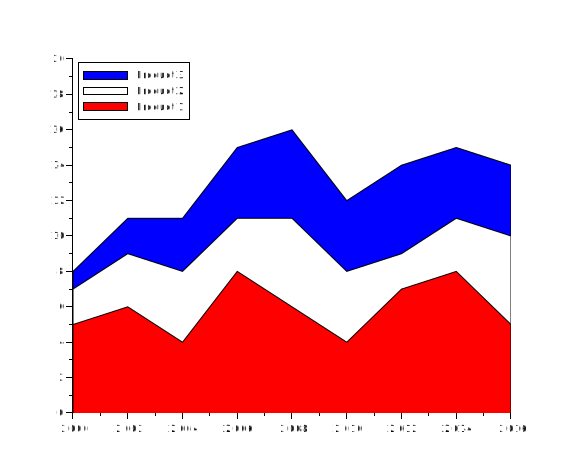

In [20]:
f1=scf(1);
f1.figure_size=[600,600];

ax=f1.children(1);
ax.data_bounds=[2000 0;2016 20];
ax.tight_limits=['on' 'on' 'on'];

an=[2000 2000 2002 2004 2006 2008 2010 2012 2014 2016 2016]; // 2000 repeated as 2016
prod1=[0 5 6 4 8 6 4 7 8 5 0]; // we must therefore impose a zero value at both ends.
prod2=[0 2 3 4 3 5 4 2 3 5 0];
prod3=[0 1 2 3 4 5 4 5 4 4 0];
plot2d(an,prod1+prod2+prod3);

poly1=ax.children(1).children(1);
poly1.fill_mode='on';
poly1.background=2;

plot2d(an,prod1+prod2);// the difference with "poly1" is indeed the "prod3" quantity
poly2=ax.children(1).children(1);
poly2.fill_mode='on';
poly2.background=8;

plot2d(an,prod1);
poly3=ax.children(1).children(1);
poly3.fill_mode='on';
poly3.background=5;
legend(f1,'Product 3', 'Product 2', 'Product 1', 2, %t ); // 2 corresponds to "upper left". The other values ​​can be seen in the help of "legend" ("position" property).

### Legend

The **legend** function create a legend in the figure. A legend can contain LaTeX mathematical expressions

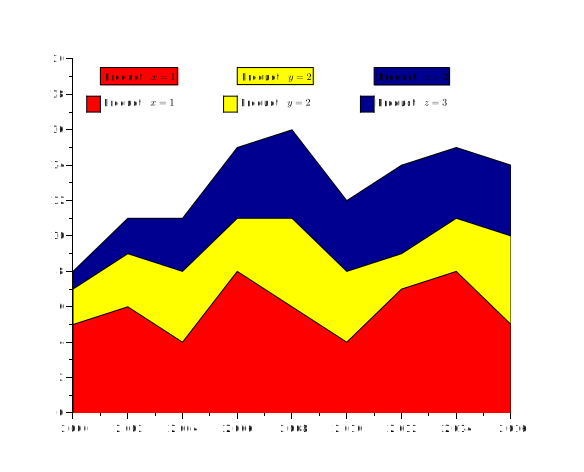

In [21]:
f1=scf(1);
f1.figure_size=[600,600];

ax=f1.children(1);
ax.data_bounds=[2000 0;2016 20];
ax.tight_limits=['on' 'on' 'on'];

an=[2000 2000 2002 2004 2006 2008 2010 2012 2014 2016 2016];
prod1=[0 5 6 4 8 6 4 7 8 5 0];
prod2=[0 2 3 4 3 5 4 2 3 5 0];
prod3=[0 1 2 3 4 5 4 5 4 4 0];

// It is possible to include LaTeX text in the legend
legend_1=['Product ' '$x=1$'];
legend_2=['Product ' '$y=2$'];
legend_3=['Product ' '$z=3$'];
color_1=9;
color_2=7;
color_3=5;

plot2d(an,prod1+prod2+prod3);
poly1=ax.children(1).children(1);
poly1.fill_mode='on';
poly1.background=color_1;

plot2d(an,prod1+prod2);
poly1=ax.children(1).children(1);
poly1.fill_mode='on';
poly1.background=color_2;

plot2d(an,prod1);
poly1=ax.children(1).children(1);
poly1.fill_mode='on';
poly1.background=color_3;

// framed text
xstring(2001, 18.5, legend_1, 0, 1);
leg1=gce();
leg1.fill_mode='on';
leg1.background=color_3;

xstring(2006, 18.5,legend_2,0,1);
leg2=gce();
leg2.fill_mode='on';
leg2.background=color_2;

xstring(2011, 18.5,legend_3,0,1);
leg3=gce();
leg3.fill_mode='on';
leg3.background=color_1;

xstring(2001, 17,legend_1,0,0);
// rect_4=xstringl(2001, 17,legend_1,0,0);
// find the position and size of the legend
// rect_4(2) gives the top position of the box surrounding the test
// rect_4(4) gives the height of this box
xrect([2000.5 17.9, 0.5, 0.9]);
rect4=gce();
rect4.fill_mode='on';
rect4.background=color_3;

xstring(2006, 17,legend_2,0,0);
//rect_5=xstringl(2006, 17,legend_2,0,0);
xrect([2005.5 17.9,0.5,0.9]);
rect5=gce();
rect5.fill_mode='on';
rect5.background=color_2;

xstring(2011, 17,legend_3,0,0);
//rect_6=xstringl(2011, 17,legend_3,0,0);
xrect([2010.5 17.9,0.5,0.9]);
rect6=gce();
rect6.fill_mode='on';
rect6.background=color_1;